In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from io import StringIO

In [88]:
def format_df(path, cols):
	with open(path, "r") as f:
		lines = f.readlines()

	cols.insert(0, "Dates")
	data_lines = [line for line in lines if re.match(r"^\d{8}", line.strip())]

	df = pd.read_csv(
		StringIO("".join(data_lines)),
		sep=r"\s+",
		names=cols,
		engine="python"
	)
	df["Dates"] = pd.to_datetime(df["Dates"], format="%Y%m%d")
	df = df.set_index("Dates")
	return df

In [89]:
momentum_path = "data/F-F_Momentum_Factor_daily.txt"

df_mom = format_df(momentum_path, ["Mom"])
df_mom

,Mom
Dates,
1926-11-03,0.54
1926-11-04,-0.51
1926-11-05,1.17
1926-11-06,-0.03
1926-11-08,-0.02
...,...
2025-06-24,-0.37
2025-06-25,-0.48
2025-06-26,0.17


In [90]:
factors_path = "data/F-F_Research_Data_5_Factors_2x3_daily.txt"

df_factors = format_df(factors_path, ["Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"])
df_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Dates,,,,,,
1963-07-01,-0.67,0.00,-0.34,-0.01,0.16,0.012
1963-07-02,0.79,-0.26,0.26,-0.07,-0.20,0.012
1963-07-03,0.63,-0.17,-0.09,0.18,-0.34,0.012
1963-07-05,0.40,0.08,-0.27,0.09,-0.34,0.012
1963-07-08,-0.63,0.04,-0.18,-0.29,0.14,0.012
...,...,...,...,...,...,...
2025-06-24,1.17,0.25,-0.51,-1.07,0.30,0.017
2025-06-25,-0.07,-1.17,-0.06,-0.14,0.86,0.017
2025-06-26,0.88,0.76,0.32,-0.37,-0.03,0.017


In [91]:
spx_path = "data/SPX_database_2010.xlsx"
df_tri = pd.read_excel(spx_path, sheet_name="total_ret").set_index("Dates")
df_tri

,LYB UN Equity,AXP UN Equity,VZ UN Equity,TPL UN Equity,AVGO UW Equity,BA UN Equity,SOLV UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,...,WY UN Equity.1,WYNN UW Equity.1,XEL UW Equity.1,XOM UN Equity.1,XYL UN Equity.1,XYZ UN Equity.1,YUM UN Equity.1,ZBH UN Equity.1,ZBRA UW Equity.1,ZTS UN Equity.1
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,45.7541,47.1902,11.26,1.829,65.363,NaN,73.9167,58.4516,106.9438,...,24.0325,68.8199,NaN,84.7537,NaN,NaN,27.3910,57.3440,28.36,NaN
2010-01-04,NaN,46.2057,47.4038,10.88,1.886,67.838,NaN,75.9401,60.1769,109.8192,...,24.6676,75.5920,NaN,85.9468,NaN,NaN,27.4850,58.2268,28.67,NaN
2010-01-05,NaN,46.1041,47.4893,11.30,1.900,70.060,NaN,76.8480,61.3425,110.5971,...,25.1912,80.1895,NaN,86.2824,NaN,NaN,27.3910,60.0700,28.62,NaN
2010-01-06,NaN,46.8494,46.1432,11.17,1.915,72.185,NaN,77.0815,61.6796,110.6110,...,24.9127,79.1376,NaN,87.0282,NaN,NaN,27.1952,60.0506,28.40,NaN
2010-01-07,NaN,47.6059,45.8686,11.11,1.903,75.108,NaN,77.3927,62.9014,110.1942,...,24.8013,80.8277,NaN,86.7547,NaN,NaN,27.1874,61.4282,27.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-28,147.6558,439.6151,144.4543,1264.51,410.438,366.891,73.77,834.1211,625.3344,402.7659,...,66.3122,205.6585,89.4632,248.8082,158.9518,80.57,211.9713,107.5360,334.69,166.1074
2025-07-29,146.7166,436.5027,145.6478,1286.59,414.789,350.860,73.55,828.5531,622.7348,404.6988,...,66.4659,202.1652,90.9723,252.0232,158.5913,78.18,213.2787,106.3820,331.60,166.3938
2025-07-30,138.1925,429.2451,145.2727,1276.84,422.041,350.487,72.98,836.3945,628.1647,395.7559,...,65.4410,202.4425,91.0351,249.8352,156.9568,77.59,215.9377,104.5557,332.39,163.9697


In [92]:
df_sofr = pd.read_excel("./data/sofr.xlsx")
df_sofr.rename(columns={"Data": "Dates"}, inplace=True)
df_sofr["Dates"] = pd.to_datetime(df_sofr["Dates"]) 
df_sofr = df_sofr.set_index("Dates").sort_index()
df_sofr["Taxa_diaria"] = ((1 + df_sofr["Price"]) ** (1/252)) -1
df_sofr

,Price,Taxa_diaria
Dates,,
2014-01-02,0.0005,0.000002
2014-01-03,0.0005,0.000002
2014-01-06,0.0005,0.000002
2014-01-07,0.0004,0.000002
2014-01-08,0.0004,0.000002
...,...,...
2025-07-28,0.0436,0.000169
2025-07-29,0.0436,0.000169
2025-07-30,0.0432,0.000168


In [93]:
for _df in (df_mom, df_factors, df_tri):
    _df.index = pd.to_datetime(_df.index, errors="coerce")
    _df.sort_index(inplace=True)

df_mom = df_mom[(df_mom.index.year >= 2014) & (df_mom.index.year <= 2023)]
df_factors = df_factors[(df_factors.index.year >= 2014) & (df_factors.index.year <= 2023)]
df_tri = df_tri[(df_tri.index.year >= 2014) & (df_tri.index.year <= 2023)]
df_sofr = df_sofr[(df_sofr.index.year >= 2014) & (df_sofr.index.year <= 2023)]

In [94]:
import numpy as np
import pandas as pd

def _keep_cols_with_coverage(df, min_frac=0.60):
    out = df.copy()

    # Ensure there's a 'Dates' column, regardless of whether it was the index or unnamed
    if "Dates" not in out.columns:
        out = out.reset_index()
        if "Dates" not in out.columns:
            out = out.rename(columns={out.columns[0]: "Dates"})

    out["Dates"] = pd.to_datetime(out["Dates"], errors="coerce")
    out = out.sort_values("Dates")

    # Compute coverage on numeric columns only
    num = out.drop(columns=["Dates"]).select_dtypes(include=[np.number])
    coverage = num.notna().mean()
    keep = coverage[coverage >= min_frac].index.tolist()

    return out[["Dates"] + keep].copy()

# Use it after you’ve already filtered your date window (e.g., 2014–2023):
df_mom     = _keep_cols_with_coverage(df_mom,     min_frac=0.99)  # factors usually complete
df_factors = _keep_cols_with_coverage(df_factors, min_frac=0.99)
df_tri     = _keep_cols_with_coverage(df_tri,     min_frac=0.60)  # equities are spottier

In [95]:
df_tri

,Dates,LYB UN Equity,AXP UN Equity,VZ UN Equity,TPL UN Equity,AVGO UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,...,WTW UW Equity.1,WY UN Equity.1,WYNN UW Equity.1,XOM UN Equity.1,XYL UN Equity.1,XYZ UN Equity.1,YUM UN Equity.1,ZBH UN Equity.1,ZBRA UW Equity.1,ZTS UN Equity.1
0,2014-01-01,105.8831,108.7811,92.1829,37.74,5.583,180.923,129.0057,89.0899,198.2963,...,NaN,51.8506,299.1730,139.4181,35.9134,NaN,64.1327,92.3295,54.08,32.8925
1,2014-01-02,103.9047,107.2465,91.9203,37.98,5.558,181.162,127.6703,89.2575,197.0739,...,NaN,51.3578,304.9189,137.4205,35.4567,NaN,63.6916,91.3883,53.18,32.5604
2,2014-01-03,103.8124,107.5942,90.8323,37.94,5.579,182.421,127.5993,89.9475,197.4073,...,NaN,51.4728,301.9304,137.0898,35.7784,NaN,64.0903,91.7846,53.58,32.2485
3,2014-01-06,102.8364,107.5462,91.3388,37.97,5.541,183.468,125.9229,90.4689,196.8834,...,NaN,50.9472,301.7147,137.2965,35.7162,NaN,64.0394,92.3791,53.40,32.1781
4,2014-01-07,104.1158,107.1386,92.4831,38.00,5.593,186.252,126.3349,89.4262,198.5503,...,NaN,51.0951,310.4183,139.2390,35.8199,NaN,64.9385,94.2219,53.95,32.2988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2023-12-25,204.4240,257.2854,114.0536,681.55,153.599,404.184,543.9719,337.1882,364.8199,...,268.8323,84.2304,164.4174,216.0501,133.0572,77.14,185.4641,133.0343,269.41,210.6645
2604,2023-12-26,205.7434,257.8262,114.0232,691.13,154.956,407.831,553.8450,339.1824,368.1046,...,267.7126,84.8923,165.4721,216.5377,134.2149,78.18,185.8350,134.2481,275.50,211.2263
2605,2023-12-27,205.2966,259.3513,113.5060,690.50,154.173,406.760,558.5098,341.2168,366.8970,...,267.9477,85.2110,164.7993,215.5201,135.1126,79.60,186.6625,133.9274,275.79,212.7389
2606,2023-12-28,203.6366,260.3772,114.0536,674.09,153.658,404.044,556.1868,343.0296,361.7284,...,268.9107,86.0445,166.8540,212.4037,135.0417,79.51,186.2060,134.4803,275.35,213.0198


In [96]:
def _choose_30(tri_df, random_state=42):
	tick_tri = [c for c in tri_df.columns if c != "Dates"]
	eligible = sorted(set(tick_tri))

	rng = np.random.default_rng(random_state)
	chosen = rng.choice(eligible, size=30, replace=False)
	return [str(x) for x in chosen.tolist()]

tri_30 = _choose_30(df_tri)
tri_30[:5]

['MTD UN Equity.1',
 'KEYS UN Equity.1',
 'HBAN UW Equity',
 'SWK UN Equity',
 'AVGO UW Equity']

In [97]:
def compute_daily_excess(df_tri, df_sofr, tickers):
    tri = df_tri.reset_index()[["Dates"] + tickers].copy()
    tri["Dates"] = pd.to_datetime(tri["Dates"])
    tri = tri.set_index("Dates").sort_index()
    daily_ret = tri.pct_change().dropna(how="all")

    rf = df_sofr.copy()
    if "Dates" in rf.columns:
        rf = rf.set_index("Dates")
    elif "Data" in rf.columns:
        rf = rf.set_index("Data")
    rf.index = pd.to_datetime(rf.index)
    rf = rf.sort_index()

    rf_daily = (rf["Price"].astype(float) / 360.0)
    rf_daily = rf_daily.reindex(daily_ret.index, method="ffill")

    daily_excess = daily_ret.sub(rf_daily, axis=0).dropna(how="all")
    return daily_excess, daily_ret, rf_daily

daily_excess, daily_stock_ret, daily_rf = compute_daily_excess(df_tri, df_sofr, tri_30)
daily_excess

,MTD UN Equity.1,KEYS UN Equity.1,HBAN UW Equity,SWK UN Equity,AVGO UW Equity,AWK UN Equity.1,CI UN Equity.1,SPGI UN Equity,RF UN Equity,NVR UN Equity,...,HSIC UW Equity,LII UN Equity,HSY UN Equity,J UN Equity.1,PPG UN Equity,UPS UN Equity.1,OXY UN Equity.1,MSFT UW Equity.1,ATO UN Equity.1,POOL UW Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.004371,NaN,-0.011401,-0.006321,-0.004479,-0.016092,-0.014633,-0.005759,-0.000001,-0.008686,...,-0.006745,-0.009175,-0.013372,-0.001748,-0.003800,-0.016748,-0.013145,-0.007215,-0.016514,-0.013417
2014-01-03,0.004884,NaN,0.006290,0.002488,0.003777,-0.002887,0.002319,-0.002697,-0.002024,0.002211,...,0.003708,0.010565,-0.001253,-0.009384,0.002490,-0.002228,-0.003518,-0.006729,0.001565,-0.000350
2014-01-06,-0.001196,NaN,-0.002083,-0.009202,-0.006813,-0.003861,-0.003126,-0.002070,0.020261,0.006159,...,-0.002286,-0.006462,-0.002820,0.001283,-0.009983,-0.013000,0.002993,-0.020320,-0.012294,-0.013430
2014-01-07,0.024502,NaN,0.015654,0.004265,0.009383,0.009927,0.025773,0.008787,0.002975,-0.011457,...,0.015040,0.009335,0.015281,0.008816,0.004057,0.003242,0.018655,0.006913,0.022403,0.005125
2014-01-08,0.005273,NaN,0.002053,0.001247,0.015018,-0.000242,-0.004981,-0.001538,0.014851,-0.003927,...,0.016475,0.017556,0.007628,0.002701,0.006318,-0.000786,-0.007955,-0.017853,0.005311,-0.002815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,...,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148,-0.000148
2023-12-26,0.004325,0.004813,0.013277,0.006472,0.008686,0.005248,0.006661,0.003048,0.015418,0.003867,...,0.006525,0.004965,0.004673,0.000710,0.006173,-0.001539,0.010211,0.000065,0.007684,0.011919
2023-12-27,0.002910,0.001975,-0.002488,-0.000960,-0.005203,-0.000452,-0.003415,0.008492,-0.001683,0.002222,...,0.005419,0.005968,0.002686,0.015298,0.002989,-0.007680,-0.006660,-0.001724,0.000800,0.006959


## Factor Model

$$
r_t = \alpha + \beta_1 f_{1,t} + \beta_2 f_{2,t} + \ldots + \beta_n f_{n,t} + \epsilon_t
$$	

let $t$ be the time window

$r_t$ is the return at time $t$, expressed as a vector of N x 1 asset returns

$B$ is the matrix of factor loadings, with dimensions N x K, where K is the number of factors

$f_t$ is the vector of factor returns at time $t$, with dimensions K x 1

$\epsilon_t$ is the vector of idiosyncratic errors at time $t$, with dimensions N x 1

## Steps to calculate $B$

1. calculate excess returns
2. run regression of excess returns against factors

In [98]:
def build_factor_matrix(df_factors, df_mom):
    df_factors["Dates"] = pd.to_datetime(df_factors["Dates"])
    df_mom["Dates"] = pd.to_datetime(df_mom["Dates"])
    df = pd.merge(df_factors, df_mom, on="Dates", how="inner")
    X = df[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]].astype(float) / 100.0
    X["Mom"] = df["Mom"].astype(float) / 100.0
    X.index = df["Dates"]
    X = X.loc["2014-01-02":"2023-12-29"]
    return X

def estimate_betas(R_df, F_df):


    # 1) Médias e centralização
    mu_R = R_df.mean(axis=0)              # (N,)
    mu_F = F_df.mean(axis=0)              # (K,)
    R_c  = R_df - mu_R
    F_c  = F_df - mu_F
    T    = len(R_c)

    # 2) Covariâncias (ddof=1)
    Sigma_RF = (R_c.to_numpy().T @ F_c.to_numpy()) / (T - 1)   # (N x K)
    Sigma_FF = (F_c.to_numpy().T @ F_c.to_numpy()) / (T - 1)   # (K x K)

    # 3) Betas (B = Σ_RF Σ_FF^{-1})
    B = Sigma_RF @ np.linalg.pinv(Sigma_FF)                    
    B_df = pd.DataFrame(B, index=R_df.columns, columns=F_df.columns)

    # 4) Alpha = mean(R) - B * mean(F)
    alpha_s = mu_R - (B_df @ mu_F)                            
    alpha_s.name = "alpha"

    return B_df, alpha_s

def align_returns_and_factors(daily_excess, X,
                              start=None, end=None):
    R = daily_excess.copy()
    F = X.copy()
    R.index = pd.to_datetime(R.index).tz_localize(None).normalize()
    F.index = pd.to_datetime(F.index).tz_localize(None).normalize()

    # (Opcional) recorte de período
    if start or end:
        R = R.loc[start:end]
        F = F.loc[start:end]
    R = R[~R.index.duplicated(keep="last")].sort_index()
    F = F[~F.index.duplicated(keep="last")].sort_index()
    idx = R.index.intersection(F.index)

    R_al = R.loc[idx]
    F_al = F.loc[idx]
    mask = ~(R_al.isna().any(axis=1) | F_al.isna().any(axis=1))
    R_al = R_al.loc[mask]
    F_al = F_al.loc[mask]


    return R_al, F_al

def fitted_excess_returns(F_df, B_df, alpha_s):

    alpha_s = alpha_s.reindex(B_df.index)

    # (T x K) @ (K x N) => (T x N)
    R_hat = F_df.dot(B_df.T)
    # somar alpha por coluna (ticker)
    R_hat = R_hat.add(alpha_s, axis=1)
    return R_hat  # T x N

# Minimum Variance Portfolio (MVP)
def compute_mvp_weights(returns):
    R = returns.copy()
    R = R.dropna(axis=1, how="all").dropna(axis=0, how="any")
    Sigma = R.cov() 


    one = np.ones(Sigma.shape[0])
    Sigma_inv = np.linalg.pinv(Sigma.values)
    w = Sigma_inv @ one
    w = w / (one @ Sigma_inv @ one)
    return pd.Series(w, index=Sigma.columns, name="w_mvp")


X = build_factor_matrix(df_factors, df_mom)
R_df, F_df = align_returns_and_factors(daily_excess, X, start="2014-01-02", end="2023-12-29")
B, alpha = estimate_betas(R_df, F_df)
B.head(), alpha.head()
Retorno = fitted_excess_returns(F_df, B, alpha)
mvp_w = compute_mvp_weights(daily_excess)

In [99]:
def vol_mvp_vs_factorbased(R_df ,Retorno):
    freq = 252
    cols = R_df.columns.intersection(Retorno.columns)
    R = R_df[cols].copy()
    H = Retorno[cols].copy()
    R, H = R.align(H, join="inner", axis=0)
    R = R.dropna(how="any")
    H = H.reindex(index=R.index).dropna(how="any")

    base_weights = pd.Series(1.0 / len(cols), index=cols, dtype=float)
    w_base = base_weights.reindex(cols).fillna(0.0)
    w_base = w_base / w_base.sum()

    # Pesso mvp (check)
    w_mvp = compute_mvp_weights(R)

    r_mvp = R.dot(w_mvp.reindex(cols))
    r_fac = H.dot(w_base)

    #volatilidades
    vol_mvp_daily = float(r_mvp.std(ddof=1))
    vol_fac_daily = float(r_fac.std(ddof=1))
    vol_mvp_annual = vol_mvp_daily * np.sqrt(freq)
    vol_fac_annual = vol_fac_daily * np.sqrt(freq)

    print(f"Vol (excesso) — MVP Σ regular: diária {vol_mvp_daily:.4%} | anual {vol_mvp_annual:.2%}")
    print(f"Vol (excesso) — Factor-based : diária {vol_fac_daily:.4%} | anual {vol_fac_annual:.2%}")

    return {
        "vol_mvp_daily": vol_mvp_daily,
        "vol_mvp_annual": vol_mvp_annual,
        "vol_factor_daily": vol_fac_daily,
        "vol_factor_annual": vol_fac_annual,
        "w_mvp": w_mvp,
        "w_base": w_base,
        "r_mvp": r_mvp,
        "r_factorbased": r_fac,
    }

vols = vol_mvp_vs_factorbased(R_df, Retorno)

Vol (excesso) — MVP Σ regular: diária 1.0165% | anual 16.14%
Vol (excesso) — Factor-based : diária 1.3593% | anual 21.58%


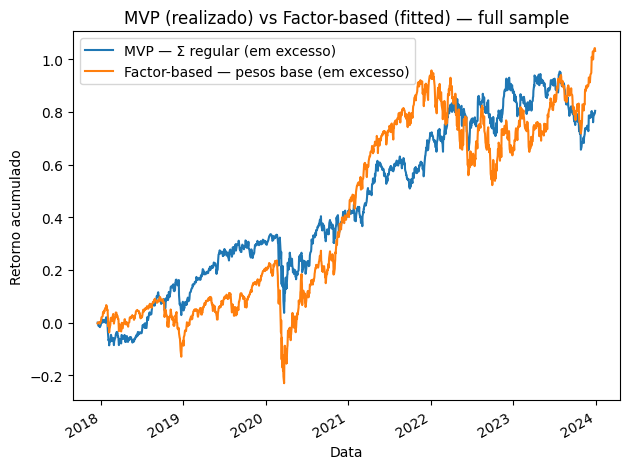

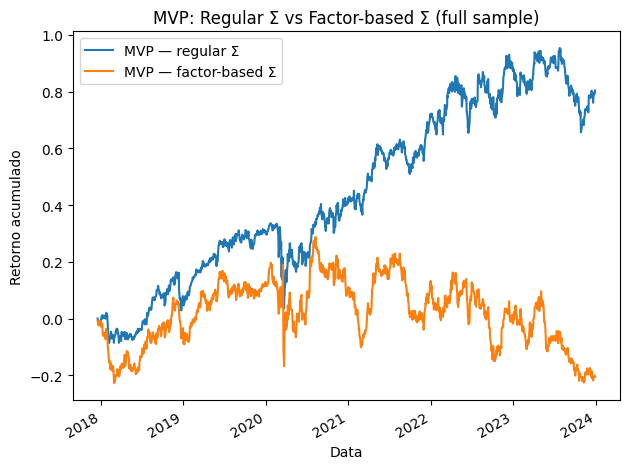

In [100]:
def plot_mvp_vs_factorbased(R_df: pd.DataFrame, Retorno: pd.DataFrame, base_weights: pd.Series | None = None):

    cols = R_df.columns.intersection(Retorno.columns)
    R = R_df[cols].copy()
    H = Retorno[cols].copy()
    R, H = R.align(H, join="inner", axis=0)
    R = R.dropna(how="any")
    H = H.reindex(index=R.index).dropna(how="any")



    base_weights = pd.Series(1.0 / len(cols), index=cols, dtype=float)
    base_weights = base_weights.reindex(cols).fillna(0.0)
    base_weights = base_weights / base_weights.sum()


    w_mvp = compute_mvp_weights(R)

    # 4) Séries de retorno dos dois portfólios
    r_mvp        = R.dot(w_mvp.reindex(cols))     
    r_factorbase = H.dot(base_weights)            

    nav_mvp = (1.0 + r_mvp).cumprod()
    nav_fac = (1.0 + r_factorbase).cumprod()

    plt.figure()
    (nav_mvp - 1.0).rename("MVP — Σ regular (em excesso)").plot()
    (nav_fac - 1.0).rename("Factor-based — pesos base (em excesso)").plot()
    plt.title("MVP (realizado) vs Factor-based (fitted) — full sample")
    plt.xlabel("Data"); plt.ylabel("Retorno acumulado")
    plt.legend(); plt.tight_layout(); plt.show()

    return {"w_mvp": w_mvp, "w_base": base_weights, "r_mvp": r_mvp, "r_factorbase": r_factorbase}


def compara (R_df, Retorno):
    w_reg = compute_mvp_weights(R_df)      
    w_fac = compute_mvp_weights(Retorno)  


    cols = R_df.columns.intersection(w_reg.index).intersection(w_fac.index)
    r_reg = R_df[cols].dot(w_reg.reindex(cols))
    r_fac = R_df[cols].dot(w_fac.reindex(cols))
    plot_mvp_vs_factorbased(R_df, Retorno)  

    nav_reg = (1.0 + r_reg).cumprod()
    nav_fac = (1.0 + r_fac).cumprod()

    plt.figure()
    (nav_reg - 1.0).rename("MVP — regular Σ").plot()
    (nav_fac - 1.0).rename("MVP — factor-based Σ").plot()
    plt.title("MVP: Regular Σ vs Factor-based Σ (full sample)")
    plt.xlabel("Data"); plt.ylabel("Retorno acumulado")
    plt.legend(); plt.tight_layout(); plt.show()

compara(R_df, Retorno)

### BackTest 
#### MVP vs Factor Based

In [101]:
import numpy as np
import pandas as pd

def _rebalance_backtest(returns: pd.DataFrame,
                        weight_fn,
                        freq: str = "M",
                        lookback: int = 252,
                        min_history: int = 60):
    R = returns.dropna(how="any").copy()
    idx = pd.to_datetime(R.index)

    rebal_series = idx.to_series().groupby(idx.to_period(freq)).first()
    rebal_dates = pd.Index(rebal_series.values) 

    r_list = []
    weights_hist = {}

    for i, d in enumerate(rebal_dates):
        est = R.loc[:d].iloc[:-1].tail(lookback)
        if len(est) < min_history:
            continue 

        w = weight_fn(est)
        w = pd.Series(w, index=R.columns, dtype=float).fillna(0.0)
        if w.sum() != 0:
            w = w / w.sum()
        weights_hist[d] = w

        if i + 1 < len(rebal_dates):
            d_next = rebal_dates[i + 1]
            seg = R.loc[(R.index >= d) & (R.index < d_next)]
        else:
            seg = R.loc[R.index >= d]

        r_p = seg.dot(w.reindex(R.columns))
        r_list.append(r_p)

    r_all = pd.concat(r_list).sort_index() if r_list else pd.Series(dtype=float, index=R.index)
    W_hist = pd.DataFrame(weights_hist).T
    return r_all, W_hist


def manager_rebalance(R_df: pd.DataFrame,
                      Retorno: pd.DataFrame,
                      freq: str = "M",
                      lookback: int = 252,
                      base_weights: pd.Series | None = None):

    # --- MVP (Σ regular) ---
    def _mvp_weight_fn(est_returns: pd.DataFrame):
        return compute_mvp_weights(est_returns)

    r_mvp, W_mvp = _rebalance_backtest(R_df, _mvp_weight_fn, freq=freq, lookback=lookback)


    base_weights = pd.Series(1.0 / Retorno.shape[1], index=Retorno.columns, dtype=float)

    def _base_weight_fn(est_returns: pd.DataFrame):
        w = base_weights.reindex(est_returns.columns).fillna(0.0)
        return w / w.sum() if w.sum() != 0 else w

    r_fac, W_fac = _rebalance_backtest(Retorno, _base_weight_fn, freq=freq, lookback=lookback)


    nav_mvp = (1.0 + r_mvp).cumprod()
    nav_fac = (1.0 + r_fac).cumprod()
    vol_mvp_ann = r_mvp.std(ddof=1) * np.sqrt(252)
    vol_fac_ann = r_fac.std(ddof=1) * np.sqrt(252)

    return {
        "r_mvp": r_mvp, "nav_mvp": nav_mvp, "vol_mvp_annual": float(vol_mvp_ann), "weights_mvp_hist": W_mvp,
        "r_factor": r_fac, "nav_factor": nav_fac, "vol_factor_annual": float(vol_fac_ann), "weights_factor_hist": W_fac
    }


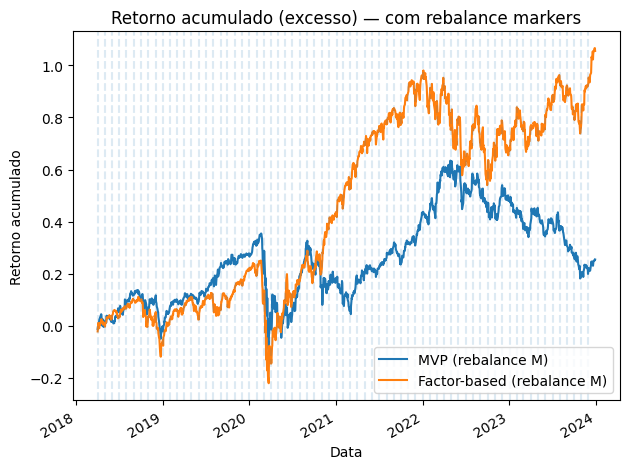

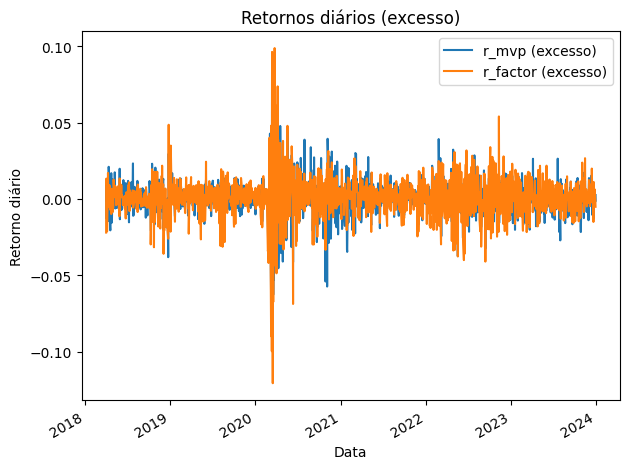

Frequência de rebalance usada: M
Total de rebalanceamentos: 69

Primeiras 10 datas de rebalance:
['2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01', '2018-09-04', '2018-10-01', '2018-11-01', '2018-12-03', '2019-01-02']

Últimas 10 datas de rebalance:
['2023-03-01', '2023-04-03', '2023-05-01', '2023-06-01', '2023-07-03', '2023-08-01', '2023-09-01', '2023-10-02', '2023-11-01', '2023-12-01']


In [102]:
freq_used = "M"
out = manager_rebalance(R_df, Retorno, freq=freq_used, lookback=252)  # mensal, janela de 252 dias


rebal_mvp = out["weights_mvp_hist"].index
rebal_fac = out["weights_factor_hist"].index


rebal_dates = rebal_mvp.union(rebal_fac)


fig, ax = plt.subplots()
(out["nav_mvp"] - 1).rename(f"MVP (rebalance {freq_used})").plot(ax=ax)
(out["nav_factor"] - 1).rename(f"Factor-based (rebalance {freq_used})").plot(ax=ax)

for d in rebal_dates:
    ax.axvline(d, linestyle="--", alpha=0.15)

ax.set_title("Retorno acumulado (excesso) — com rebalance markers")
ax.set_xlabel("Data")
ax.set_ylabel("Retorno acumulado")
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
out["r_mvp"].rename("r_mvp (excesso)").plot(ax=ax)
out["r_factor"].rename("r_factor (excesso)").plot(ax=ax)
ax.set_title("Retornos diários (excesso)")
ax.set_xlabel("Data")
ax.set_ylabel("Retorno diário")
ax.legend()
plt.tight_layout()
plt.show()


print("Frequência de rebalance usada:", freq_used)
print("Total de rebalanceamentos:", len(rebal_dates))
print("\nPrimeiras 10 datas de rebalance:")
print(pd.Index(rebal_dates).strftime("%Y-%m-%d")[:10].tolist())
print("\nÚltimas 10 datas de rebalance:")
print(pd.Index(rebal_dates).strftime("%Y-%m-%d")[-10:].tolist())


